Alzheimer (CNN(Vijay Ragavan G))

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE=224
BATCH_SIZE=32

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Alzheimer_s Dataset/train',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training'
)

Found 4098 images belonging to 4 classes.


In [5]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Alzheimer_s Dataset/train',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='validation'
)

Found 1023 images belonging to 4 classes.


In [8]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("class indices",class_indices)
print("class name:",class_names)

class indices {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
class name: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [18]:
model=keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 23s 178ms/step - accuracy: 0.9915 - loss: 0.0309 - val_accuracy: 0.6276 - val_loss: 1.6104
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.9938 - loss: 0.0199 - val_accuracy: 0.7087 - val_loss: 1.4347
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.9962 - loss: 0.0143 - val_accuracy: 0.7116 - val_loss: 1.2578
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 148ms/step - accuracy: 0.9969 - loss: 0.0109 - val_accuracy: 0.6657 - val_loss: 1.5809
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 149ms/step - accuracy: 0.9996 - loss: 0.0039 - val_accuracy: 0.6911 - val_loss: 1.5963


In [24]:
model.save('/content/drive/MyDrive/Colab Notebooks/alzheimer.h5')

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/Colab Notebooks/alzheimer.h5')
print("Model Loaded")

Model Loaded


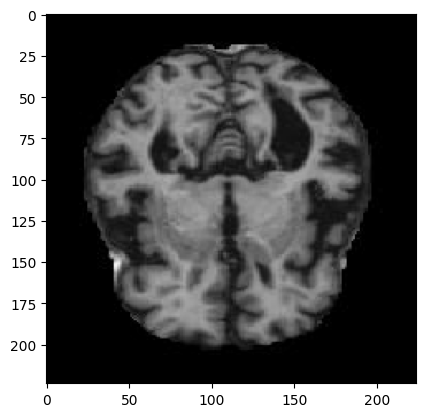

In [26]:
test_image_path="/content/drive/MyDrive/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [27]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [28]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step
MildDemented
